
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E01_gradient_descent.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Gradient descent exercises

---
These are introductory exercises in Machine learning with focus in **gradient descent** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.

<details>

<summary>Hint</summary>

Use for simulating X

´´´
np.random.rand(samples, 2)
´´´

to concatenate with ones, use ```np.c_[..., ...]```

</details>

<details>

<summary>Answer</summary>

```
array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

```

</details>

---

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# rand gives you a decimal while randint gives you a whole number
np.random.seed(42)
X = np.random.rand(1000, 2)
E = np.random.normal(0, 1, 1000)
y = 3*X[:,0] + 5*X[:,1] + 3 + E

X = np.c_[np.ones(1000), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 3), (330, 3), (670,), (330,))

## 1. Gradient descent - learning rate (*)

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and calculate $\vec{\theta}$ for each fifth epoch from 1 to 500. So the procedure is as follows:
- calculate $\vec{\theta}$ for epochs = 1
- calculate $\vec{\theta}$ for epochs = 6
- ...
- calculate $\vec{\theta}$ for epochs = 496

Plot these $\vec{\theta}$ values against epochs. (*)

&nbsp; b) Do the same as for a) but with learning rate $\eta = 0.01$, 5000 epochs and for each 20th epoch. What do you notice when changing the learning rate? (*)

&nbsp; c) Experiment with larger and smaller $\eta$ and see what happens.

<details>

<summary>Answer</summary>

a) 

<img src="../assets/grad_desc_converg.png" height="200"/>

b) 

<img src="../assets/grad_desc_converg_001.png" height="200"/>

</details>

---

In [2]:
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((670, 3), (330, 3), (670, 1), (330, 1))

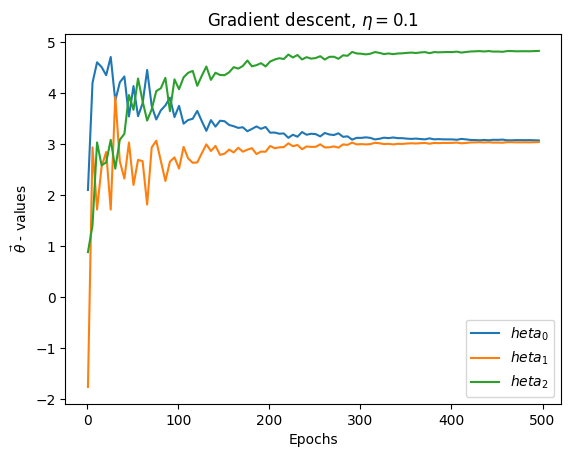

In [3]:
import matplotlib.pyplot as plt

def gradient_descent(X_train, y_train, learning_rate = .1, iterations = 100):
    m = len(X_train)

    theta = np.random.randn(X_train.shape[1],1)

    for _ in range(iterations):
        gradient = 2 / m * X_train.T @ (X_train @ theta - y_train)
        theta -= learning_rate * gradient

    return theta

theta = gradient_descent(X_train, y_train)
theta.reshape(-1)
theta.shape

steps = range(1, 500, 5)
thetas = [gradient_descent(X_train, y_train.reshape(-1,1), iterations = iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = ["$\theta_0$", "$\theta_1$", "$\theta_2$"])
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent, $\eta = 0.1$" )
ax.legend();

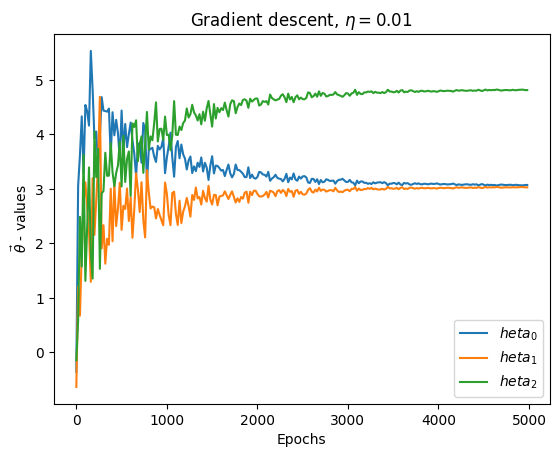

In [4]:
steps = range(1, 5001, 20)
thetas = [gradient_descent(X_train, y_train.reshape(-1,1),learning_rate=0.01, iterations = iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = ["$\theta_0$", "$\theta_1$", "$\theta_2$"])
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent, $\eta = 0.01$" )
ax.legend();

## 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

---

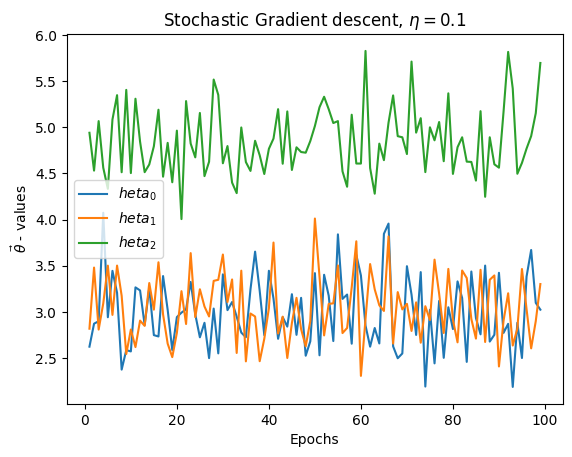

In [7]:
def stochastic_gradient_descent(X_train, y_train, learning_rate = .1, iterations = 10):
    m = len(X_train)
    epochs = iterations
    theta = np.random.randn(X_train.shape[1],1)

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            x_i = X_train[random_index: random_index + 1] # this gives an extra dimension on the matrix
            y_i = y_train[random_index: random_index + 1]
            gradients = 2 * x_i.T @ (x_i @ theta - y_i)
            theta -= learning_rate * gradients

    return theta

# theta = stochastic_gradient_descent(X_train, y_train)
# theta.reshape(-1)
# theta.shape

steps = range(1, 100, 1)
thetas = [stochastic_gradient_descent(X_train, y_train.reshape(-1,1), iterations = iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = ["$\theta_0$", "$\theta_1$", "$\theta_2$"])
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Stochastic Gradient descent, $\eta = 0.1$" )
ax.legend();

## 3. Mini Batch Gradient Descent (**)

Now try different sizes of mini-batches and make some exploratory plots to see convergence. Also you can make comparison to the other algorithms by using same $\eta$ and same amount of epochs to see how they differ from each other in terms of convergence. (**)

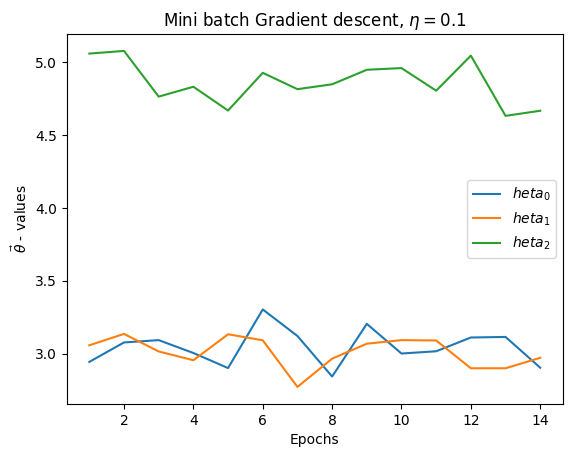

In [8]:
def mini_batch_gradient_descent(X_train, y_train, learning_rate = .1, iterations = 10, batch_size = 10):    
    m = len(X_train)
    epochs = iterations
    theta = np.random.randn(X_train.shape[1],1)

    for epoch in range(epochs):
        for i in range(m):
            random_indices = np.random.choice(m, batch_size, replace=False)
            x_i = X_train[random_indices] 
            y_i = y_train[random_indices]
            gradients = 2 / batch_size * x_i.T @ (x_i @ theta - y_i)
            theta -= learning_rate * gradients

    return theta

# theta = stochastic_gradient_descent(X_train, y_train)
# theta.reshape(-1)
# theta.shape

steps = range(1, 15, 1)
thetas = [mini_batch_gradient_descent(X_train, y_train.reshape(-1,1), iterations = iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = ["$\theta_0$", "$\theta_1$", "$\theta_2$"])
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Mini batch Gradient descent, $\eta = 0.1$" )
ax.legend();

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---